In [10]:
######## Create, Train, and Predict Models

# Loads train, test, and val datasets
# Instantiates Models
# Trains Models
# Predicts using Models

Import All Required Modules

In [37]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
from sklearn.model_selection import KFold
from modules.data_structures.model_dataset import ModelDataset
from model_binaries.utils.binary_utils import save_entity, load_entity, cross_val_train, compute_f1, graph_entity, assess_dataset_balance, evaluate_modelV01_predictions, plot_margin_distributions, swap_team_sides_in_dataset

In [38]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === MODEL MANAGER
yaml_path0 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_000.yaml'
yaml_path1 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_001.yaml'
yaml_path2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_002.yaml'
yaml_path3 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_003.yaml'
yaml_path4 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_004.yaml'
yaml_path5 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_005.yaml'
yaml_path6 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006.yaml'
yaml_path6V2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006V2.yaml'
yaml_path10 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_010.yaml'
yaml_path11 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_011.yaml'
yaml_path12 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_012.yaml'

yaml_path13333 = 'tune alpha, then add new is home feature, no reg, reduce constraints'


checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()

Load Train Datasets into Memory

In [39]:
# File path to load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01/scaler"

In [40]:
train_dataset = load_entity(train_test_val_folder_path, "scaled_train.pkl")
validation_dataset = load_entity(train_test_val_folder_path, "scaled_val.pkl")

In [41]:
randomized_train_dataset = swap_team_sides_in_dataset(train_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)
randomized_val_dataset = swap_team_sides_in_dataset(validation_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)

Load & Train on predefined trained and val datasets

In [42]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path6V2]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

In [43]:
models = model_manager.create_models(yamls)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006V2.yaml'

In [ ]:
model_manager.train(models, [(randomized_train_dataset, randomized_val_dataset)], save_after_training=True)

INFO:root:Training model '55d4ca4e8714a4ccb2fcacf9e3fc4e82' for 20 epochs with batch size 32.


Epoch 1/20
637/637 [==============================] - 24s 33ms/step - loss: 737.4562 - mse: 735.7153 - mae: 17.1828 - val_loss: 227.7471 - val_mse: 225.9925 - val_mae: 12.0564
Epoch 2/20
637/637 [==============================] - 20s 32ms/step - loss: 192.5654 - mse: 190.8065 - mae: 11.0014 - val_loss: 232.0908 - val_mse: 230.3280 - val_mae: 12.1735
Epoch 3/20
637/637 [==============================] - 20s 32ms/step - loss: 177.2946 - mse: 175.5337 - mae: 10.5441 - val_loss: 210.7192 - val_mse: 208.9606 - val_mae: 11.6050
Epoch 4/20
637/637 [==============================] - 20s 32ms/step - loss: 171.4772 - mse: 169.7242 - mae: 10.3568 - val_loss: 171.3515 - val_mse: 169.6039 - val_mae: 10.3886
Epoch 5/20
637/637 [==============================] - 20s 32ms/step - loss: 170.4033 - mse: 168.6609 - mae: 10.3330 - val_loss: 233.6694 - val_mse: 231.9336 - val_mae: 12.3043
Epoch 6/20
637/637 [==============================] - 20s 32ms/step - loss: 170.1906 - mse: 168.4683 - mae: 10.3150 - va

INFO:root:Model '55d4ca4e8714a4ccb2fcacf9e3fc4e82': Finished training.


Model saved successfully at: models/55d4ca4e8714a4ccb2fcacf9e3fc4e82/model_weights_55d4ca4e8714a4ccb2fcacf9e3fc4e82.pth


Assess Performance

In [34]:
predictions = models[0].predict(randomized_val_dataset.examples, return_target_labels=True)

In [35]:
# Get all metrics for trained model on val dataset predictions
metrics = evaluate_modelV01_predictions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")
metrics

{'mse_A': 293.50534,
 'mse_B': 286.03055,
 'mae_A': 14.015171,
 'mae_B': 13.769007,
 'combined_mse': 289.76794,
 'combined_mae': 13.892089,
 'accuracy': 0.5125687352710133,
 'precision': 0.5059665871121718,
 'recall': 0.6724821570182395,
 'f1': 0.5774599931903303,
 'auc': 0.5035982189417947}

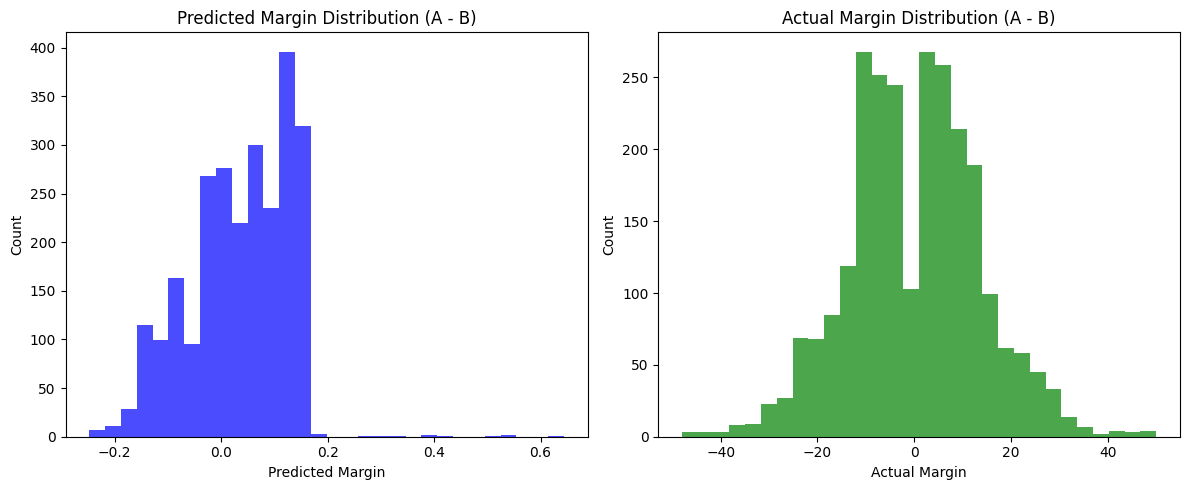

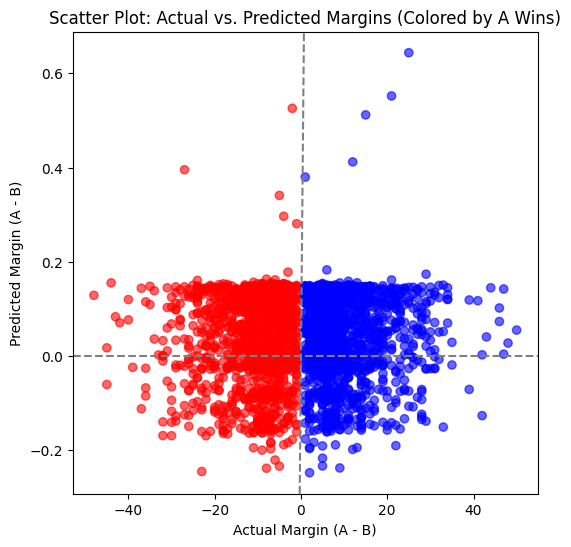

In [36]:
plot_margin_distributions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")

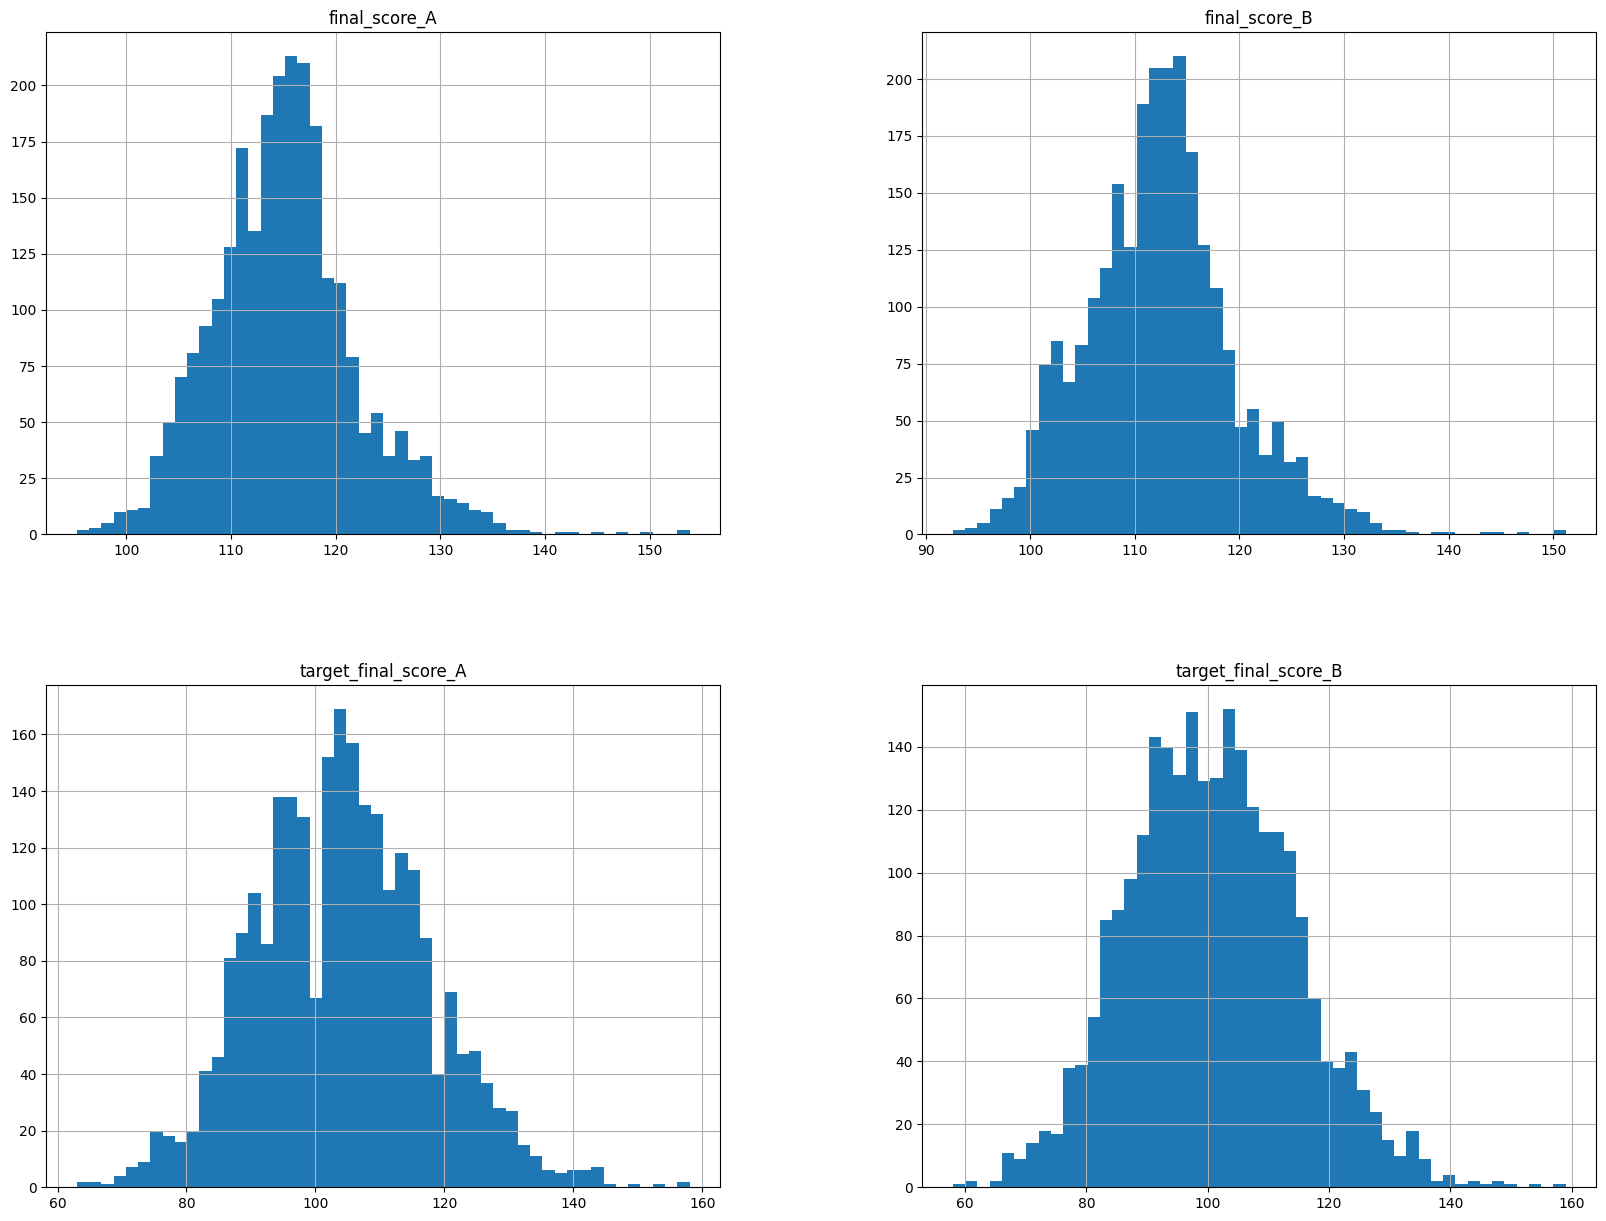

In [19]:
# Graph distribution of predictions against labels 
graph_entity(predictions=predictions,bins=50)

In [24]:
# Print actual predictions against labels
predictions

,final_score_A,final_score_B,target_final_score_A,target_final_score_B
0,121.810410,119.301140,100.0,90.0
1,112.978073,110.514702,113.0,85.0
2,117.657745,115.140450,92.0,84.0
3,116.340981,113.831291,100.0,89.0
4,125.095825,122.523888,105.0,113.0
...,...,...,...,...
2541,107.489105,103.132042,101.0,112.0
2542,116.885971,114.403679,95.0,98.0
2543,105.888351,101.503349,99.0,100.0
2544,112.984940,108.852112,124.0,105.0


Launch Tensorboard

In [ ]:
%tensorboard --logdir=./logs

CROSS VALIDATION ALTERNATIVE

Create and Train Models Using KFold Cross Validation

In [24]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path3]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

Get Averaged Metrics for KFold

In [ ]:
avg_metrics = cross_val_train(model_manager=model_manager, yamls=yamls, train_dataset=train_dataset, n_splits=5)
f1 = compute_f1(avg_metrics["val_precision"], avg_metrics["val_recall"])
print(avg_metrics)
print(f1)